This is where we will implement and code everything....

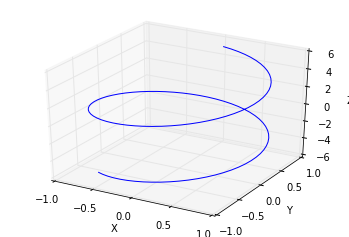

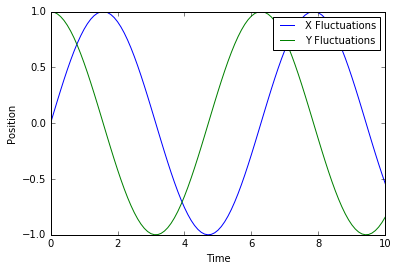

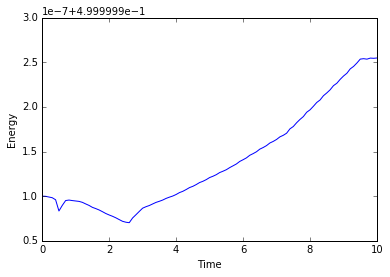

In [92]:
"""UNIFORM: 

Will simulate a single particle in a uniform B-field
A simplistic case meant to be a proof of concept
Will be initally plotted in 2D and will later be expanded to 3D 
so we can better see more complicated corkscrew shapes


possibly make a single code to simulate particle charges?
just make the equation of the B-field varry (constant = 1, or varrying =sin or cos, 
random = break total field into bits and mult by random number)

do we put boundaries to bounce on? or do we let it shoot out of the testing area?



PARAMETERS
charge (positive or negative and what value, have it enterable in units of e)
length of field/length of testing area
number of steps to calculate (remember its in 3D so you may have to use less to save time)
inital velocity x
inital velocity y
inital velocity z
time for the expeiment to take place (maybe have a cutoff once particle exits field 
or a ways after so we can see slightly more long term effects (simple (if paramter = 1.5 field length- end )))
    I am more in favor of this cutoff method to be our primary method of ending the code. Though we could add 
    **kwargs statement so if we only want to see a  tiny amount of time, we can (and then add statement that 
    if time= anything use that)


Output




Location(and plotted with connecting line)
Array of KE values for each step

"""
    
    
    
from scipy.integrate import odeint
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10



def s_part_uniform(u, t, B):


    m=1
    q=1 
    x, y, z, vx, vy, vz = u
    
    r = np.sqrt(x**2 + y**2)
    
    v = np.sqrt(vx**2 + vy**2)
    
    v = q*r*B/m
    
    a = q*v*B/m
    ax = -a*(x/r)
    ay = -a*(y/r)
    az = 0
    
    if q>0 and B>0:
    
        return vx, vy, vz, ax, ay, az
    
    if q<0 and B>0:
         
        return -vx, -vy, vz, -ax, -ay, -az
    
    if q<0 and B<0:
    
        return vx, vy, vz, ax, ay, az
    
    if q>0 and B<0:
    
        return -vx, -vy, vz, -ax, -ay, -az







p0 = [0, 1, 5, 1, 0, -1]
#p0= [xi,yi,zi,vx,vy,vz]

N = 101

t = np.linspace(0, 10, N)
u = np.zeros((len(t), 7))
B = 1




uniformpart = odeint(s_part_uniform, p0, t, args=(B,))

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(uniformpart[:,0], uniformpart[:,1], uniformpart[:,2])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

plt.plot(t, uniformpart[:,0], label="X Fluctuations")
plt.plot(t, uniformpart[:,1], label="Y Fluctuations")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Position")
plt.show()


energy = (1.0/2)*((uniformpart[:,3])**2 + (uniformpart[:,4])**2)

plt.plot(t, energy)
plt.xlabel("Time")
plt.ylabel("Energy")
plt.show()




3


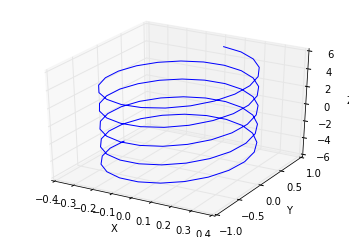

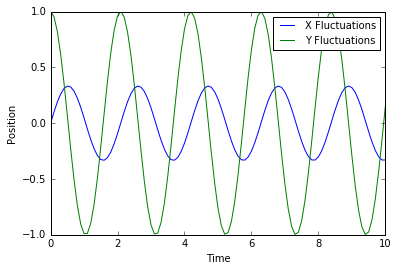

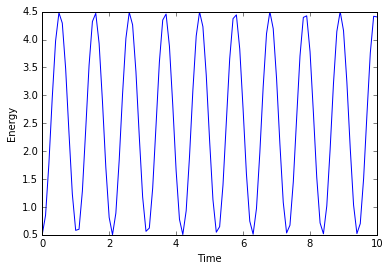

In [71]:
""""Randomly Selected Uniform"""
    


from scipy.integrate import odeint
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import random



mpl.rcParams['legend.fontsize'] = 10

N = 101

t = np.linspace(0, 10, N)
u = np.zeros((len(t), 7))
B = random.randint(-5,5)

print (B)

def s_part_randomuniform(u, t, B):              # t, u, B
    q = 1
    m = 1
    x, y, z, vx, vy, vz = u
    

    Bx=B*1
    By=B*1
    Bz=B*1
    
    r = np.sqrt(x**2 + y**2)
    
    v = np.sqrt(vx**2 + vy**2)
    v = q*r*B/m
    
    #vx = -v*x/r
    #vy = -v*y/r
    
    #a = q*v*B/m
    ax = -q*v*Bx/m*(x/r)
    ay = -q*v*By/m*(y/r)
    az = 0
    
    
    if q>0 and B>=0:
    
        return vx, vy, vz, ax, ay, az
    
    if q<0 and B>=0:
         
        return -vx, -vy, vz, -ax, -ay, -az
    
    if q<0 and B<0:
    
        return vx, vy, vz, ax, ay, az
    
    if q>0 and B<0:
    
        return -vx, -vy, vz, -ax, -ay, -az

    
#p0= [xi,yi,zi,vx,vy,vz]
p0 = [0, 1, 5, 1, 0, -1]






from scipy.integrate import odeint
randuniformpart = odeint(s_part_randomuniform, p0, t, args=(B,))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(randuniformpart[:,0], randuniformpart[:,1], randuniformpart[:,2])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

plt.plot(t, randuniformpart[:,0], label="X Fluctuations")
plt.plot(t, randuniformpart[:,1], label="Y Fluctuations")
plt.xlabel("Time")
plt.ylabel ("Position")
plt.legend()
plt.show()


energy = (1.0/2)*((randuniformpart[:,3])**2 + (randuniformpart[:,4])**2)

plt.plot(t, energy)
plt.xlabel("Time")
plt.ylabel("Energy")
plt.show()







/Users/Nick/anaconda/lib/python3.5/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


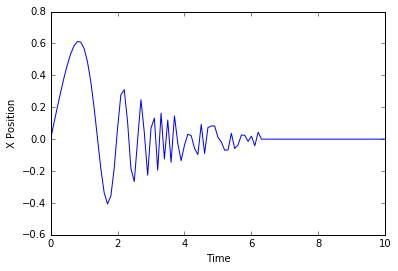

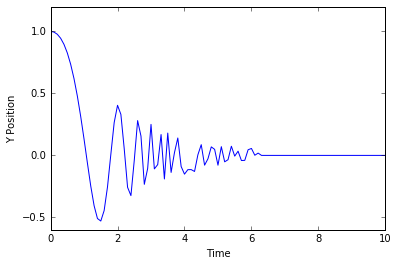

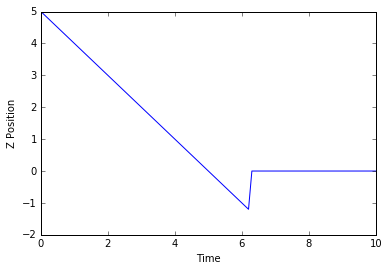

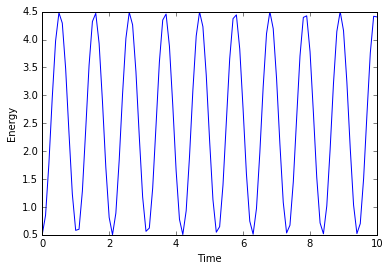

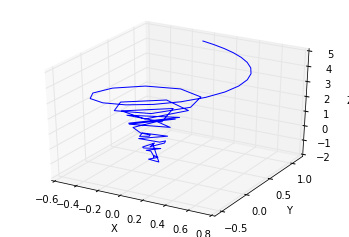

In [105]:

"""NONUNIFORM"""


   
           
    
from scipy.integrate import odeint
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10


N = 101

t = np.linspace(0, 10, N)
u = np.zeros((len(t), 7))


def nonuniform(u, t):              # t, u, B
    q = 1
    m = 1
    x, y, z, vx, vy, vz, B = u
    
    r = np.sqrt(x**2 + y**2)
    
    v = q*r*B/m
    
   
    
    a = q*v*B/m
    ax = -a*(x/np.sqrt(x**2 + y**2))
    ay = -a*(y/np.sqrt(x**2 + y**2))
    az = 0
    
    return vx, vy, vz, ax, ay, az, B

#Initial Conditions
#p0= [xi,yi,zi,vx_i,vy_i,vz_i, B]
p0 = [0, 1, 5, 1, 0, -1, 1]

B = np.random.randint(-10, 10, N)


from scipy.integrate import odeint
solution = odeint(nonuniform, p0, t)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(t, solution[:,0])
plt.xlabel("Time")
plt.ylabel("X Position")
plt.show()

plt.plot(t, solution[:,1])
plt.xlabel("Time")
plt.ylabel("Y Position")
plt.show()

plt.plot(t, solution[:,2])
plt.xlabel("Time")
plt.ylabel("Z Position")
plt.show()


energy = (1.0/2)*((randuniformpart[:,3])**2 + (randuniformpart[:,4])**2)

plt.plot(t, energy)
plt.xlabel("Time")
plt.ylabel("Energy")
plt.show()


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(solution[:,0], solution[:,1], solution[:,2])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

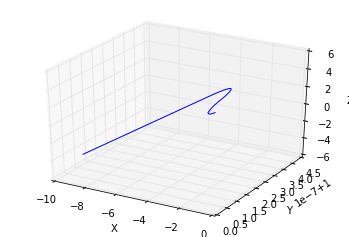

In [128]:

    
from scipy.integrate import odeint
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10


N = 101

t = np.linspace(0, 10, N)
u = np.zeros((len(t), 7))

def B_random(t):
    return t*np.random.randint(-5,5,1)


def sp_random(u, t, B):              # t, u, B
    q = 1
    m = 1
    x, y, z, vx, vy, vz = u
    
    r = np.sqrt(x**2 + y**2)
    v = np.sqrt(vx**2 + vy**2)
    
    v = q*r*B(t)/m
   
    
    a = q*v*B(t)/m
    ax = -a*(x/r)
    ay = -a*(y/r)
    az = 0 
    
    return vx, vy, vz, ax, ay, az

p0 = [0,  1, 5, -1, 0, -1]


from scipy.integrate import odeint
solution = odeint(sp_random, p0, t, args=(B_random,))


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(solution[:,0], solution[:,1], solution[:,2])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

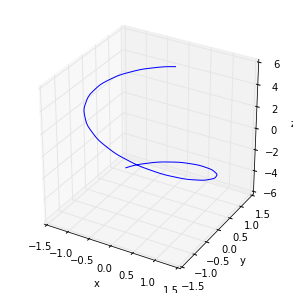

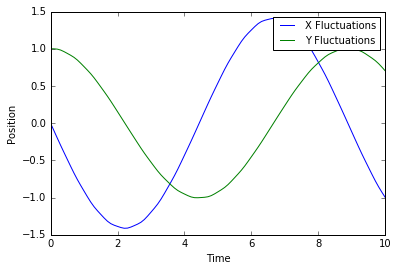

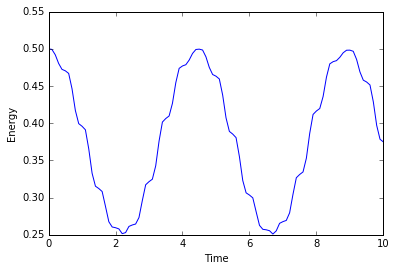

In [122]:
"""Nonuniform Oscillating"""

def B_oscillating(t):
    return np.sin(2*np.pi*t)


def oscillating(u, t, B):              # t, u, B
    q = 1
    m = 1
    x, y, z, vx, vy, vz = u
    
    r = np.sqrt(x**2 + y**2)
    v = np.sqrt(vx**2 + vy**2)
    
    v = q*r*B(t)/m
    #vx = vt*x/r
    #vy = vt*y/r
    #vz = vz
    
    a = q*v*B(t)/m
    ax = -a*(x/r)
    ay = -a*(y/r)
    az = 0 #-a*(/r)
    
    return vx, vy, vz, ax, ay, az

p0 = [0,  1, 5, -1, 0, -1]

from scipy.integrate import odeint
oscillate  = odeint(oscillating, p0, t, args=(B_oscillating,))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (5,5))
ax = fig.gca(projection='3d')
ax.plot(oscillate[:,0],  oscillate[:,1],  oscillate[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

plt.plot(t, oscillate[:,0], label="X Fluctuations")
plt.plot(t, oscillate[:,1], label="Y Fluctuations")
plt.xlabel("Time")
plt.ylabel ("Position")
plt.legend()
plt.show()


energy = (1.0/2)*((oscillate[:,3])**2 + (oscillate[:,4])**2)

plt.plot(t, energy)
plt.xlabel("Time")
plt.ylabel("Energy")
plt.show()
